In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("/content/insurance.csv")
data.head(5)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [7]:
data.describe(include='object').T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


In [9]:
data.duplicated().sum()

1

In [11]:
data.drop_duplicates(inplace=True)

Observations:

This dataset contains 1338 rows and 7 columns.

There are no null values in this dataset.

There are 4 numeric as well as 3 categorical features present in this dataset.

There was 1 duplicate row present in this dataset.

In [13]:
pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 25.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=0d96f8adc23e49bf031185156bfa57eb2578ea824a81f8a037541fe24107e085
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.2.1
    Uninstalling pydantic-2.

In [14]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import matplotlib
%matplotlib inline

<ipython-input-14-f681ef2b0710>:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


<Figure size 3500x3500 with 0 Axes>

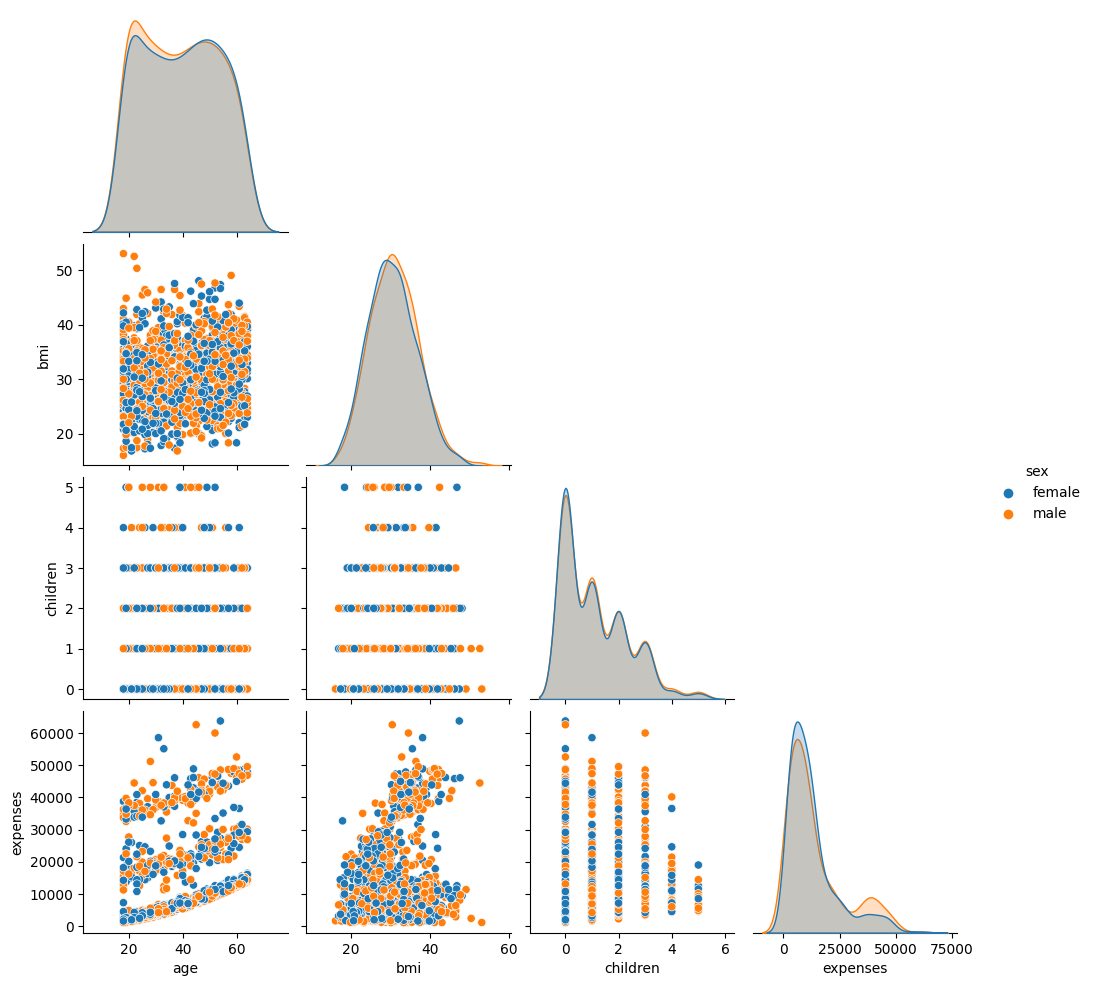

In [15]:
plt.figure(figsize=(35,35))
sns.pairplot(data=data, hue='sex', corner = True)

In [16]:
# Retrieving numerical columns from dataset
numeric_columns = [feature for feature in data.columns if data[feature].dtype != 'O']
# Retrieving categorical columns from dataset
categorical_columns = [feature for feature in data.columns if data[feature].dtype == 'O']

In [17]:
print(f"This data set contains {len(numeric_columns)} numerical columns: {numeric_columns}")
print(f"This data set contains {len(categorical_columns)} categorical columns: {categorical_columns}")

This data set contains 4 numerical columns: ['age', 'bmi', 'children', 'expenses']
This data set contains 3 categorical columns: ['sex', 'smoker', 'region']


In [19]:
data.skew()

<ipython-input-19-b3b431164adb>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


age         0.054781
bmi         0.284463
children    0.937421
expenses    1.515391
dtype: float64

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(15, 15), dpi=500)

fig.suptitle('Univariate Analysis', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i, column in enumerate(numeric_columns):

    ax = axes[i // 2, i % 2]

    sns.distplot(x=data[column], kde=True, ax=ax)

    ax.axvline(data[column].mean(), linestyle="dashed", label="mean", color="k")

    ax.set_xlabel(column)

    ax.legend(loc="best")

    ax.set_title(f"Distribution of {column}", color="navy")

plt.tight_layout()

plt.show()

<ipython-input-21-d8ec94833cdc>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data[column], kde=True, ax=ax)
<ipython-input-21-d8ec94833cdc>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data[column], kde=True, ax=ax)
<ipython-input-21-d8ec94833cdc>:16: UserWarning: 

`distplot` is a

In [22]:
import scipy.stats as stats

def diagnostic_plots(df, variable):
    '''
    Generate diagnostic plots for a specific variable.

    Parameters:
        df (DataFrame): The input DataFrame containing the data.
        variable (str): The name of the variable to analyze.

    Returns:
        None: The function displays the histogram and Q-Q plot side by side.

    '''

    # Create a figure with two subplots (1 row, 2 columns)
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Plot the histogram on the first subplot
    axes[0].hist(df[variable], bins=20, edgecolor='black', color='skyblue')
    axes[0].set_xlabel(variable)
    axes[0].set_title('Histogram')

    # Plot the Q-Q plot on the second subplot
    stats.probplot(df[variable], dist="norm", plot=axes[1])
    axes[1].set_ylabel(variable)
    axes[1].set_title('Q-Q Plot')

    # Display the plots
    plt.show()

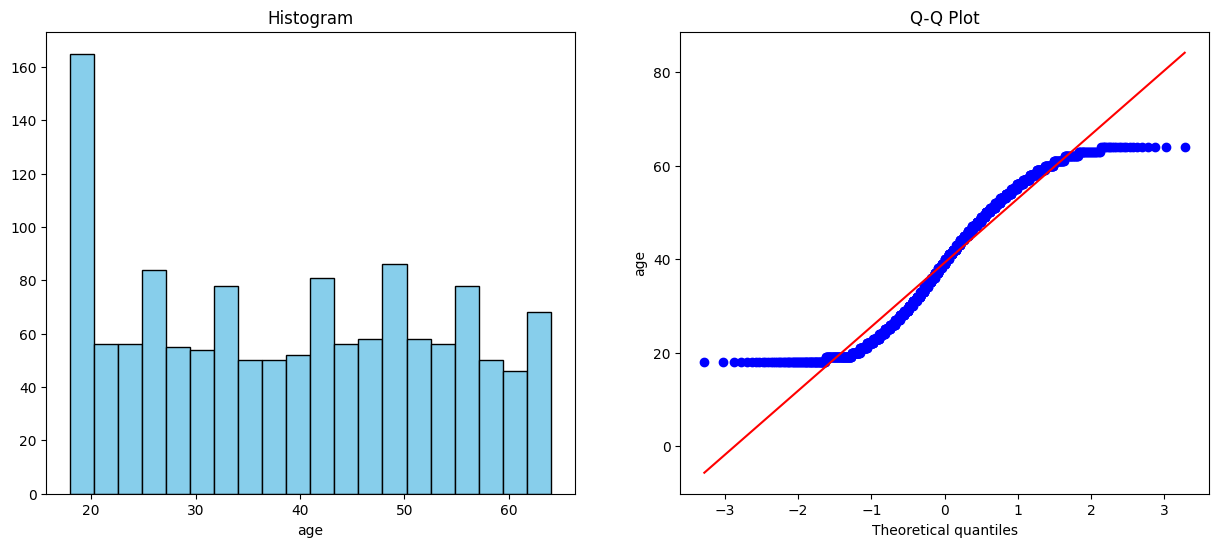

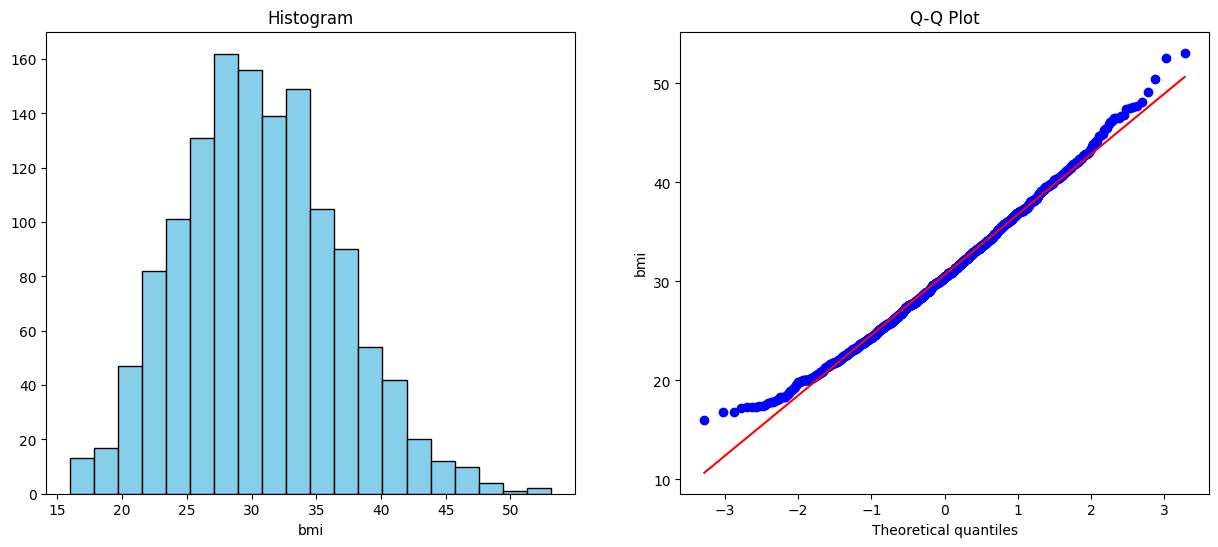

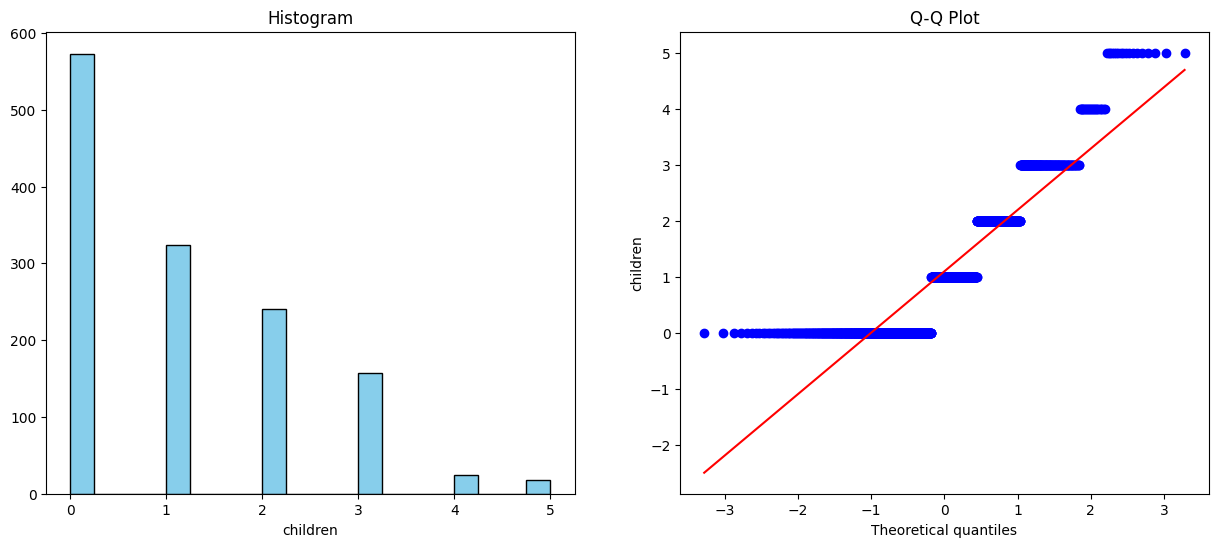

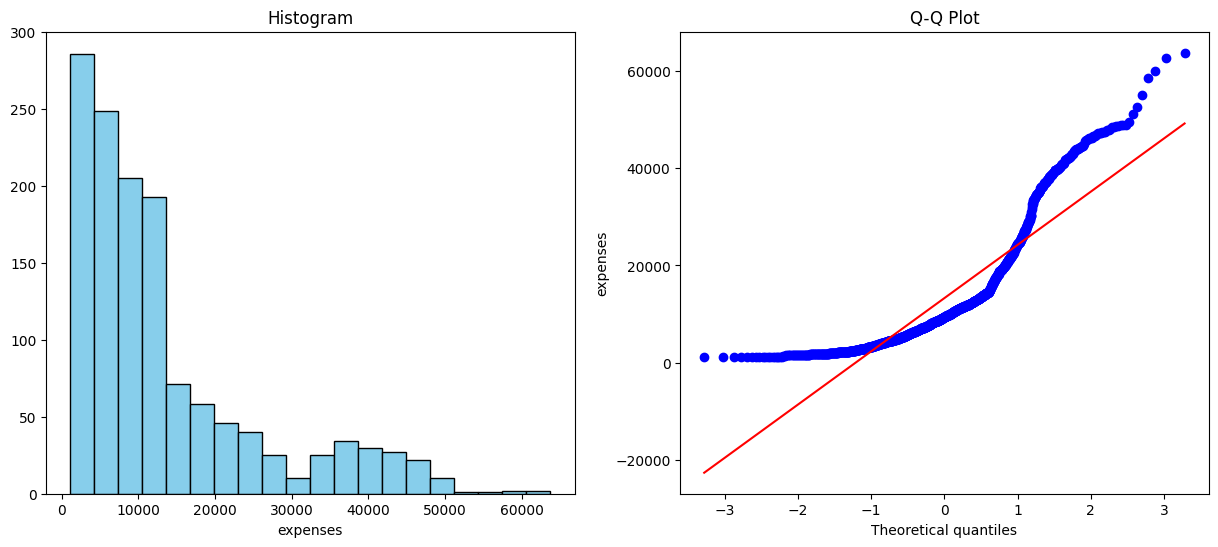

In [24]:
for col in numeric_columns:
    diagnostic_plots(data, col)

In [31]:
def age_group(X):

  if X in range(18,20):
    return '18-20'
  elif X in range(20,30):
    return '20-30'
  elif X in range(30,40):
    return '30-40'
  elif X in range(40,50):
    return '40-50'
  elif X in range(50,60):
    return '50-60'
  else:
    return '60+'

In [33]:
data['age_group']=data['age'].apply(age_group)

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_age_distribution(data):
    """
    Plot the age distribution of current health insurers.

    Parameters:
        data (DataFrame): The input DataFrame containing age information.

    Returns:
        None: The function displays the age distribution plot.
    """
    sns.set(style="whitegrid")
    plt.figure(figsize=(20, 8))

    # Calculate the total count for percentage calculation
    total = float(len(data))

    # Create a countplot for age groups
    ax = sns.countplot(x="age_group", data=data)

    # Add title and adjust plot aesthetics
    plt.title('Age of Current Health Insurers', fontsize=20)
    plt.xlabel('Age Group')
    plt.ylabel('Count')

    # Annotate each bar with the percentage of occurrences
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)

    # Display the plot
    plt.show()

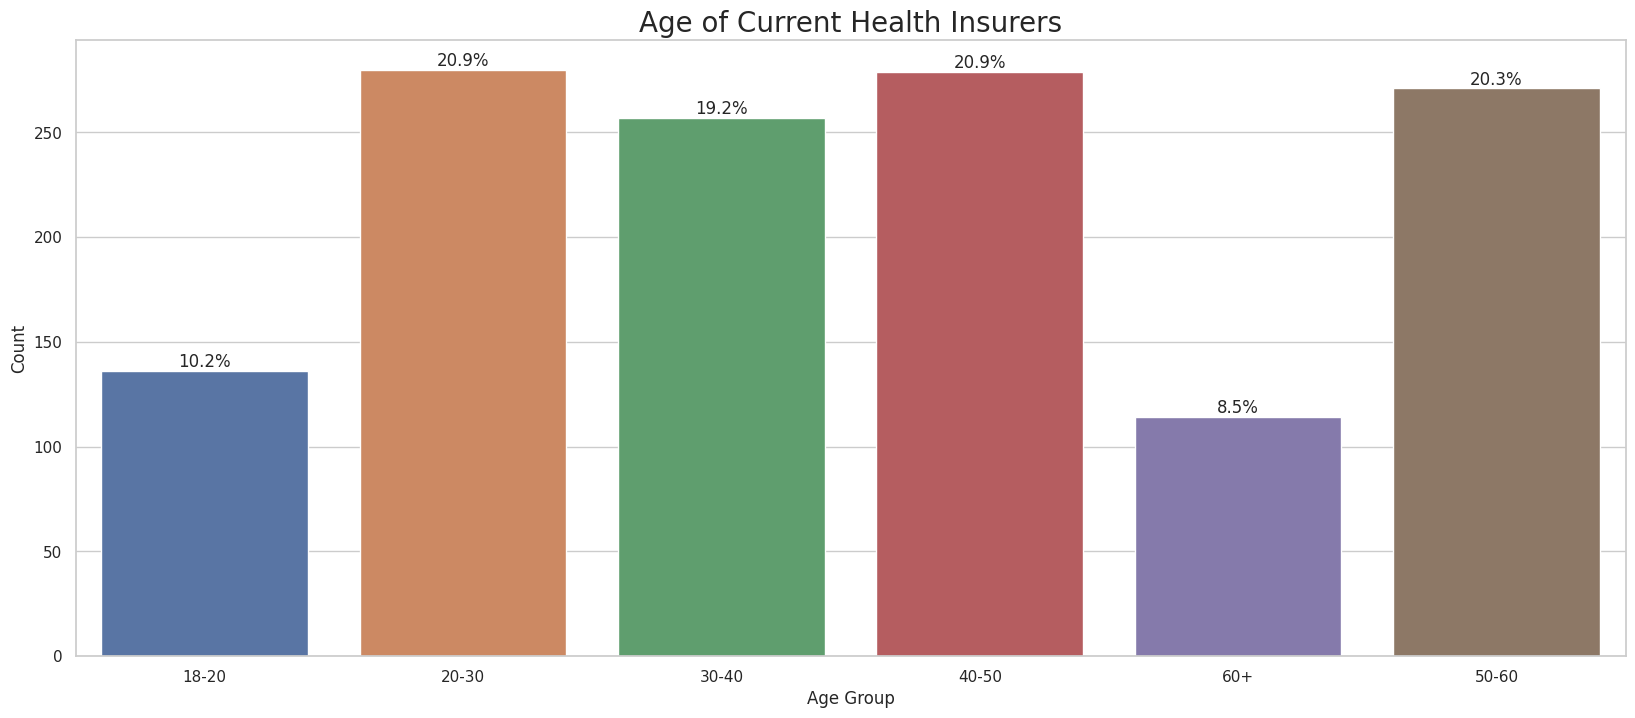

In [36]:
# Plot the age distribution
plot_age_distribution(data)

In [38]:
data.drop(["age_group"], axis=1, inplace=True)

In [40]:
scatter_fig = px.scatter(data, x="age", y="expenses", color="region", symbol="sex",
                         hover_data=['bmi', 'smoker', 'children'])

# Set the title of the plot
scatter_fig.update_layout(title_text='Relationship between Age and Expenses', title_font_size=20)

# Show the scatter plot
scatter_fig.show()

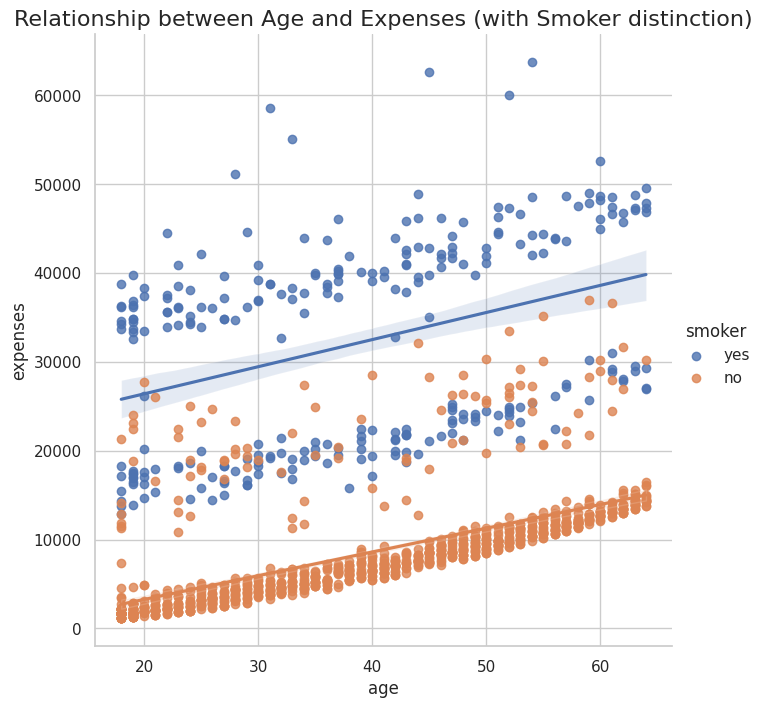

In [42]:
# Create a scatter plot with a linear regression model fit line
sns.lmplot(data=data, x='age', y='expenses', hue="smoker", height=7)

# Set the title for the plot
plt.title('Relationship between Age and Expenses (with Smoker distinction)', fontsize=16)

# Show the plot
plt.show()

<ipython-input-44-f5009859d2c0>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



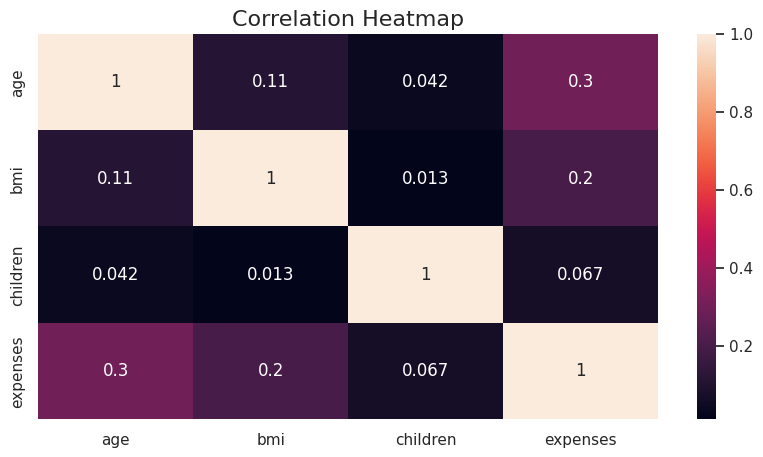

In [44]:
# Set the width and height of the figure
plt.figure(figsize=(10, 5))

# Calculate the correlation matrix
corr = data.corr()

# Create a heatmap to visualize the correlation matrix with annotations
ax = sns.heatmap(corr, annot=True)

# Set the title for the plot
plt.title('Correlation Heatmap', fontsize=16)

# Show the plot
plt.show()

In [46]:
# One hot encoding on categorical columns
data = pd.get_dummies(data,columns = ['sex', 'smoker', 'region'],drop_first = True)

In [47]:
data.head(5)

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0


In [48]:
data.sample(10)

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1017,26,34.2,2,3987.93,0,0,0,0,1
298,31,34.4,3,38746.36,1,1,1,0,0
390,48,35.6,4,10736.87,1,0,0,0,0
787,21,36.9,0,1917.32,1,0,1,0,0
203,27,36.1,0,37133.90,0,1,0,1,0
1256,51,36.4,3,11436.74,0,0,1,0,0
169,27,18.9,3,4827.90,1,0,0,0,0
199,64,39.3,0,14901.52,0,0,0,0,0
1276,22,30.4,0,2741.95,0,0,0,0,0
1088,52,47.7,1,9748.91,1,0,0,1,0


In [49]:
X=data.drop(columns=['expenses'], axis=1)
y=data['expenses']

In [50]:
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,0,1,0,0,1
1,18,33.8,1,1,0,0,1,0
2,28,33.0,3,1,0,0,1,0
3,33,22.7,0,1,0,1,0,0
4,32,28.9,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,31.0,3,1,0,1,0,0
1334,18,31.9,0,0,0,0,0,0
1335,18,36.9,0,0,0,0,1,0
1336,21,25.8,0,0,0,0,0,1


In [51]:
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1337, dtype: float64

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
X_train.shape,X_test.shape,X.shape

((1069, 8), (268, 8), (1337, 8))

In [55]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
X_train

array([[-1.1576804 , -0.9990523 , -0.90790804, ..., -0.57266946,
        -0.60581158, -0.57410974],
       [-1.30061876, -0.80064622,  0.7669042 , ..., -0.57266946,
        -0.60581158, -0.57410974],
       [ 0.91492586,  1.150347  ,  0.7669042 , ...,  1.74620801,
        -0.60581158, -0.57410974],
       ...,
       [-1.37208794, -1.41239833, -0.07050192, ..., -0.57266946,
        -0.60581158,  1.74182728],
       [-0.08564268, -0.42036788,  1.60431032, ..., -0.57266946,
        -0.60581158,  1.74182728],
       [-0.30005022,  0.88580555,  0.7669042 , ..., -0.57266946,
         1.65067825, -0.57410974]])

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
model = LinearRegression()
model.fit(X_train , y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(y_pred[:5])
print(y_test[:5])

Mean Squared Error (MSE): 35481471.59594916
[ 8135.94784906  5737.53051009 14375.4878467  31749.21910772
  8966.53643436]
900      8688.86
1064     5708.87
1256    11436.74
298     38746.36
237      4463.21
Name: expenses, dtype: float64


In [59]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
alpha = 1.0  # You can adjust the alpha (regularization strength) as needed
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")
print(y_pred[:5])
print(y_test[:5])

Mean Squared Error: 35515902.71448495
R-squared (R2) Score: 0.8067225588561007
[ 8140.09350671  5744.72602787 14373.06460245 31731.36720471
  8973.36638214]
900      8688.86
1064     5708.87
1256    11436.74
298     38746.36
237      4463.21
Name: expenses, dtype: float64


In [60]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
# Create a Lasso Regression model
lasso = Lasso(alpha=1.0)
# Fit the model to the training data
lasso.fit(X_train, y_train)
# Make predictions on the test data
y_pred = lasso.predict(X_test)
# Calculate Mean Squared Error (MSE) and R-squared (R2) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')
print(y_pred[:5])
print(y_test[:5])

Mean Squared Error (MSE): 35488799.36513801
R-squared (R2): 0.8068700552058434
[ 8134.0701556   5738.19375541 14372.62033712 31747.43288278
  8968.3561591 ]
900      8688.86
1064     5708.87
1256    11436.74
298     38746.36
237      4463.21
Name: expenses, dtype: float64


In [61]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
svr = SVR(kernel='linear', C=1.0)
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)
print(y_pred[:5])
print(y_test[:5])

Mean Squared Error: 191490016.73225692
R-squared (R2) Score: -0.04208812418890018
[ 9233.97224389  8585.48519512  9509.11091966 10039.24764033
  8740.7350602 ]
900      8688.86
1064     5708.87
1256    11436.74
298     38746.36
237      4463.21
Name: expenses, dtype: float64


In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

regressor = DecisionTreeRegressor(random_state=42)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (Accuracy): {r2}")
print(y_pred[:5])
print(y_test[:5])

Mean Squared Error: 38918076.011431344
R-squared (Accuracy): 0.7882079414902377
[ 9361.33  7243.81 10848.13 44585.46  4673.39]
900      8688.86
1064     5708.87
1256    11436.74
298     38746.36
237      4463.21
Name: expenses, dtype: float64


In [63]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")
print(y_pred[:5])
print(y_test[:5])

R-squared score: 0.899950704918084
[10307.44769556  7572.6423797  13679.44219523 39079.55172954
  6907.89018263]
900      8688.86
1064     5708.87
1256    11436.74
298     38746.36
237      4463.21
Name: expenses, dtype: float64


In [65]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

regressor = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

r_squared = r2_score(y_test, y_pred)
print(f"R-squared (R²) Score: {r_squared}")
print(y_pred[:5])
print(y_test[:5])

R-squared (R²) Score: 0.9002247479491932
[10589.594  8443.997 13668.547 39398.89   6722.166]
900      8688.86
1064     5708.87
1256    11436.74
298     38746.36
237      4463.21
Name: expenses, dtype: float64


In [66]:
# the regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.cluster import KMeans

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import silhouette_score

# feature-selection methods
from sklearn.feature_selection import SelectFromModel

    mse = mean_squared_error(true, predicted)  # Calculate Mean Squared Error
    mae = mean_absolute_error(true, predicted)  # Calculate Mean Absolute Error
    rmse = np.sqrt(mse)  # Calculate Root Mean Squared Error
    r2 = r2_score(true, predicted)  # Calculate R2 Score
    adj_r2 = 1 - (1 - r2) * (len(true) - 1) / (len(true) - X_test.shape[1] - 1)  # Calculate Adjusted R2 Score

    return mse, mae, rmse, r2, adj_r2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

def evaluate_models(X, y, models):

    train_metrics = []
    test_metrics = []

    # Separate dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scaling the dataset
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    for model_name, model in models.items():
        model.fit(X_train, y_train)  # Train the model

        # Make predictions on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Evaluate model performance for training set
        train_metrics.append(evaluate_model_metrics(model_name, y_train, y_train_pred, X_train))

        # Evaluate model performance for test set
        test_metrics.append(evaluate_model_metrics(model_name, y_test, y_test_pred, X_test))

    # Create DataFrames for training and test set metrics
    train_report = pd.DataFrame(train_metrics, columns=['Model', 'Train Mean Squared Error',
                                                        'Train Mean Absolute Error',
                                                        'Train Root Mean Squared Error',
                                                        'Train R Squared', 'Train Adjusted R2 Score'])

    test_report = pd.DataFrame(test_metrics, columns=['Model', 'Test Mean Squared Error',
                                                      'Test Mean Absolute Error',
                                                      'Test Root Mean Squared Error',
                                                      'Test R Squared', 'Test Adjusted R2 Score'])

    return train_report, test_report


def evaluate_model_metrics(model_name, true, predicted, X):

    mse = mean_squared_error(true, predicted)
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_score_value = r2_score(true, predicted)
    adj_r2_score = 1 - (1 - r2_score_value) * (len(true) - 1) / (len(true) - X.shape[1] - 1)
    return model_name, mse, mae, rmse, r2_score_value, adj_r2_score

In [68]:
# Dictionary which contains models for the experiment
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(random_state=1),
    "Lasso Regression": Lasso(random_state=1),
    "Support Vector Regression": SVR(kernel='linear'),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=1),
    "Bagging Regressor": BaggingRegressor(random_state=1),
    "AdaBoost Regressor": AdaBoostRegressor(random_state=1),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=1),
    "XGB Regressor": XGBRegressor()
}

In [69]:
train_report_df, test_report_df = evaluate_models(X,y, models)

In [70]:
train_report_df

,Model,Train Mean Squared Error,Train Mean Absolute Error,Train Root Mean Squared Error,Train R Squared,Train Adjusted R2 Score
0,Linear Regression,3.697593e+07,4181.825636,6080.783489,0.729935,0.727896
1,Ridge Regression,3.697602e+07,4182.839731,6080.791117,0.729934,0.727896
2,Lasso Regression,3.697594e+07,4181.745957,6080.784798,0.729934,0.727896
3,Support Vector Regression,1.383175e+08,7570.663458,11760.844332,-0.010246,-0.017870
4,Decision Tree Regressor,0.000000e+00,0.000000,0.000000,1.000000,1.000000
5,Bagging Regressor,4.621008e+06,1091.474835,2149.652930,0.966249,0.965994
6,AdaBoost Regressor,2.570912e+07,4081.373927,5070.415773,0.812225,0.810808
7,Gradient Boosting Regressor,1.553547e+07,2159.432938,3941.506281,0.886532,0.885675
8,XGB Regressor,7.251511e+05,504.550203,851.558068,0.994704,0.994664


In [71]:
test_report_df

,Model,Test Mean Squared Error,Test Mean Absolute Error,Test Root Mean Squared Error,Test R Squared,Test Adjusted R2 Score
0,Linear Regression,3.548147e+07,4177.267596,5956.632572,0.806910,0.800946
1,Ridge Regression,3.551590e+07,4179.843668,5959.522021,0.806723,0.800753
2,Lasso Regression,3.548880e+07,4177.435834,5957.247633,0.806870,0.800905
3,Support Vector Regression,1.914900e+08,8689.314557,13837.991788,-0.042088,-0.074276
4,Decision Tree Regressor,3.815840e+07,2963.877127,6177.248887,0.792342,0.785928
5,Bagging Regressor,2.568503e+07,2815.656030,5068.040212,0.860222,0.855905
6,AdaBoost Regressor,2.641362e+07,4259.669496,5139.417824,0.856257,0.851817
7,Gradient Boosting Regressor,1.827638e+07,2523.249757,4275.088482,0.900540,0.897468
8,XGB Regressor,2.797412e+07,3102.639577,5289.056900,0.847765,0.843063


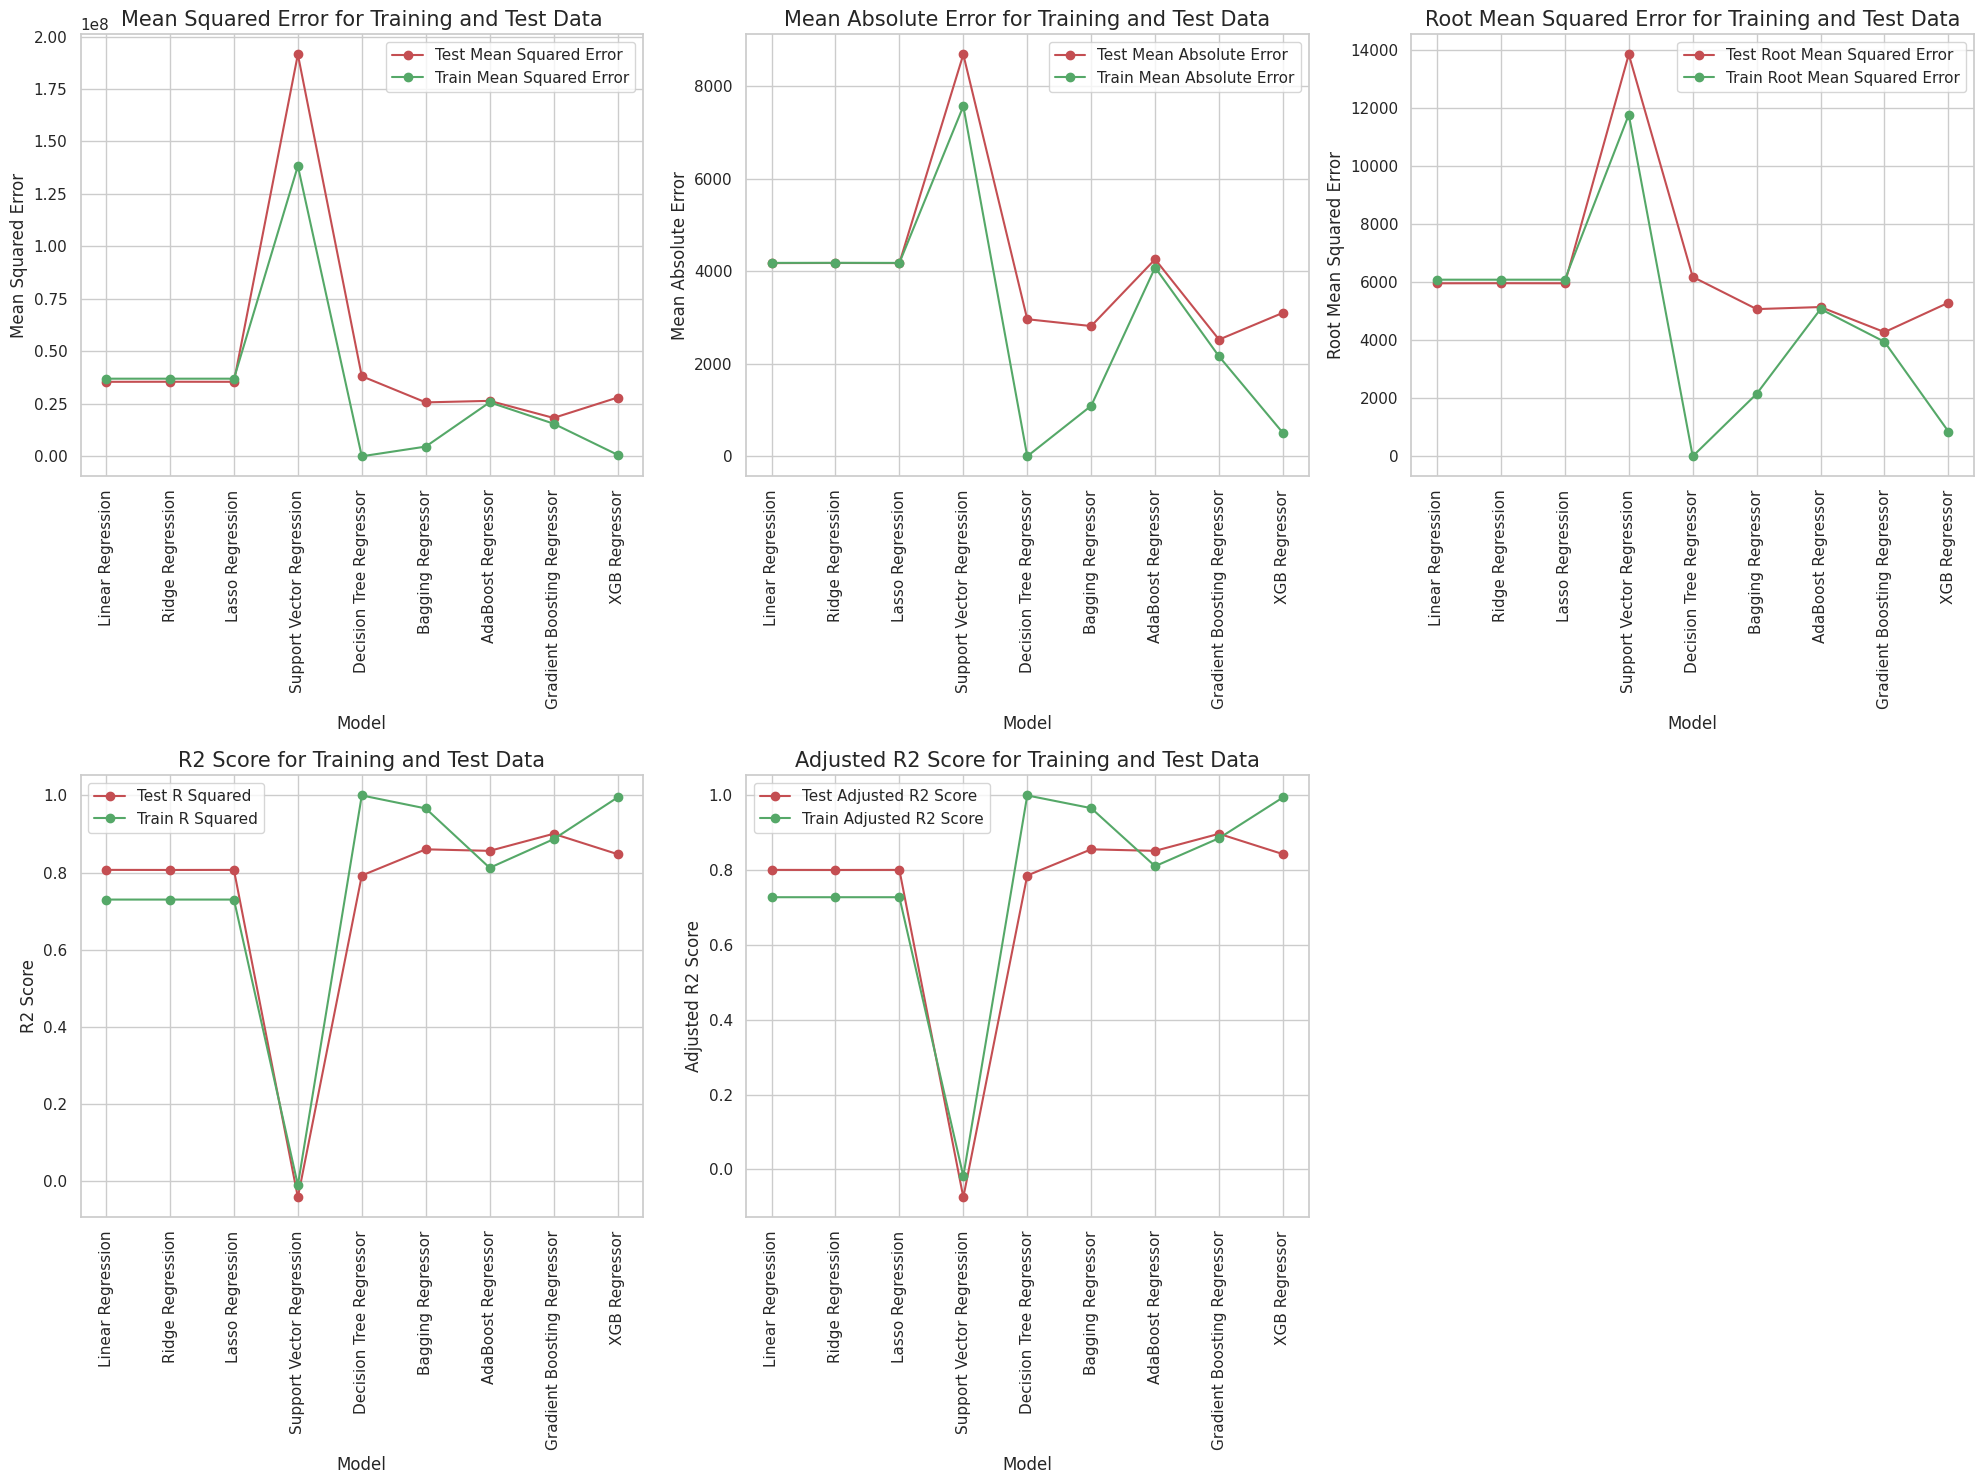

In [72]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(20, 15))

# Plot Mean Squared Error comparison
plt.subplot(2, 3, 1)
plt.plot(test_report_df['Model'], test_report_df['Test Mean Squared Error'], marker='o', color='r', label='Test Mean Squared Error')
plt.plot(train_report_df['Model'], train_report_df['Train Mean Squared Error'], marker='o', color='g', label='Train Mean Squared Error')
plt.xlabel("Model", fontsize=12)
plt.ylabel("Mean Squared Error", fontsize=12)
plt.title("Mean Squared Error for Training and Test Data", fontsize=15)
plt.xticks(rotation=90)  # Rotating the x labels
plt.legend()
plt.tight_layout()

# Plot Mean Absolute Error Comparison
plt.subplot(2, 3, 2)
plt.plot(test_report_df['Model'], test_report_df['Test Mean Absolute Error'], marker='o', color='r', label='Test Mean Absolute Error')
plt.plot(train_report_df['Model'], train_report_df['Train Mean Absolute Error'], marker='o', color='g', label='Train Mean Absolute Error')
plt.xlabel("Model", fontsize=12)
plt.ylabel("Mean Absolute Error", fontsize=12)
plt.title("Mean Absolute Error for Training and Test Data", fontsize=15)
plt.xticks(rotation=90)  # Rotating the x labels
plt.legend()
plt.tight_layout()

# Plot Root Mean Squared Error Comparison
plt.subplot(2, 3, 3)
plt.plot(test_report_df['Model'], test_report_df['Test Root Mean Squared Error'], marker='o', color='r', label='Test Root Mean Squared Error')
plt.plot(train_report_df['Model'], train_report_df['Train Root Mean Squared Error'], marker='o', color='g', label='Train Root Mean Squared Error')
plt.xlabel("Model", fontsize=12)
plt.ylabel("Root Mean Squared Error", fontsize=12)
plt.title("Root Mean Squared Error for Training and Test Data", fontsize=15)
plt.xticks(rotation=90)  # Rotating the x labels
plt.legend()
plt.tight_layout()

# Plot R2 Score Comparison
plt.subplot(2, 3, 4)
plt.plot(test_report_df['Model'], test_report_df['Test R Squared'], marker='o', color='r', label='Test R Squared')
plt.plot(train_report_df['Model'], train_report_df['Train R Squared'], marker='o', color='g', label='Train R Squared')
plt.xlabel("Model", fontsize=12)
plt.ylabel("R2 Score", fontsize=12)
plt.title("R2 Score for Training and Test Data", fontsize=15)
plt.xticks(rotation=90)  # Rotating the x labels
plt.legend()
plt.tight_layout()

# Plot Adjusted R2 Score Comparison
plt.subplot(2, 3, 5)
plt.plot(test_report_df['Model'], test_report_df['Test Adjusted R2 Score'], marker='o', color='r', label='Test Adjusted R2 Score')
plt.plot(train_report_df['Model'], train_report_df['Train Adjusted R2 Score'], marker='o', color='g', label='Train Adjusted R2 Score')
plt.xlabel("Model", fontsize=12)
plt.ylabel("Adjusted R2 Score", fontsize=12)
plt.title("Adjusted R2 Score for Training and Test Data", fontsize=15)
plt.xticks(rotation=90)  # Rotating the x labels
plt.legend()
plt.tight_layout()

# Show the plots
plt.show()
